<p style="text-align:center">
    <a href="https://nbviewer.jupyter.org/github/twMr7/Python-Machine-Learning/blob/master/14-Building_A_Machine_Learning_Model_from_Scratch.ipynb">
        Open In Jupyter nbviewer
        <img style="float: center;" src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" width="120" />
    </a>
</p>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twMr7/Python-Machine-Learning/blob/master/14-Building_A_Machine_Learning_Model_from_Scratch.ipynb)

# 14. Building A Machine Learning Model from Scratch

本章開始進入機器學習（Machine Learning）的領域，使用公開資料集來介紹如何運用 Python 的工具實現機器學習。 一開始會先只用基本工具來從頭建構一個機器學習的演算法，所以在學習本章節的內容前，需要先熟悉 Python 的基本容器、Numpy `ndarray`、 Pandas `DataFrame` 和 `Series` 的操作、以及 Matplotlib 的繪圖工具。 有了自己動手從頭建構演算法的經驗後，接著會介紹 **Scikit-Learn** 套件所提供的機器學習工具。

| 工具函式庫套件      | 網址                                                                    |
|---------------------|-------------------------------------------------------------------------|
| **`numpy`**         | [numpy.org](https://numpy.org/doc/stable/)                              |
| **`pandas`**        | [pandas.pydata.org](https://pandas.pydata.org/docs/reference/index.html)|
| **`matplotlib`**    | [matplotlib.org](https://matplotlib.org/stable/contents.html)           
| **`scikit-learn`**  | [scikit-learn.org](https://scikit-learn.org/stable/documentation.html)  |


+ [**14.1 機器學習的基本認識**](#ml-basic)
+ [**14.2 二元分類案例 — 乳癌檢測**](#binary-classification)
+ [**14.3 Logistic Regression 學習模型**](#logistic-regression)
+ [**14.4 Gradient Descent 最佳化演算法**](#gradient-descent)
+ [**14.5 從頭實作 Binary Logistic Regression**](#blr-fromscratch)
+ [**14.6 使用 Scikit-Learn 的 LogisticRegression**](#sklearn-lr)
+ [**參考資料**](#references)

<a id="ml-basic"></a>

## 14.1 機器學習的基本認識

一般而言，機器學習關心的是要如何從已知的資料中，建構一個可以用來預測未知資料特性的模型。 執行學習的任務使用電腦系統的演算法來***自動發現數據的規律性***，稱為模式識別（Pattern Recognition）。 所以機器學習演算法的設計，所關心的是如何識別資料中隱含的模式來作推論，而不是明確指示推論的邏輯。

![MnistExample](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

以著名的 [MNIST](http://yann.lecun.com/exdb/mnist/) 手寫辯識資料庫為例。每一個數字是 28x28 個像素的影像，也就是要從 784 個實數的向量資料中，辨識出所代表的 0, 1, 2, ..., 9 的正確數字。 要達到接近人類辨識的正確率，用手工打造（hand-engineering）辨識的特徵及規則非常的困難。 透過機器學習的方法可以取得比手工打造規則還要好的結果，甚至於超越人類辨識的正確率。

常見的 **監督式學習（supervised learning）** 手法，使用帶有正確答案且數量夠大的資料集 $X$ 來調整匹配模型的參數，這個資料集稱為 **訓練集（training set）**。 每筆資料（影像）的類別（數字）都已經事先知道，並且在資料集裡都有對應欄位作標籤註記正確答案（例如標註是0-9其中某個數字），我們稱為標籤向量或目標向量 $Y$。 所執行的機器學習演算法可以表示為學習一個複雜函數的對應關係。

$$
Y = f(X)
$$

確切的 $f(X)$ 函數模型則是透過 **訓練（training）** 的過程來決定，這個過程也稱為 **學習（learning）**。 模型經過訓練後可以用來 **推論（inference）** 判斷訓練過程沒見過的新資料，稱為 **測試集（test set）**，足以正確判斷分類新資料的能力稱為 **泛化（generalization）**，設計具備足夠泛化能力的演算法就是機器學習的主要目標。

監督式學習中，根據學習目標數據的特質有不同的解決手法。 常見的術語，例如從手寫數字的影像辨識成有限數量的 0 到 9 的數字類別，這樣的問題稱為 **分類（classification）** 問題，由於是分辨多個類別的其中一種，又叫 **多元分類（multiclass classification）**。 如果是醫學中常見的區分有病（positive）、沒病（negative）的推斷，稱為 **二元分類（binary classification）**。 現實中另外還常見有一種輸入帶有多種類別標籤的數據，例如電影的分類，某部片可能同時有家庭、科幻、動作、史詩、愛情片，這種稱為 **multi-label calssification**。 假如問題輸出的目標包含一個或多個連續數值的變量，則稱為 **回歸（regression）**。

另外有一種 **非監督式學習（unsupervised learning）** 的方式，使用的訓練集資料沒有包含任何對應的目標向量，而學習的目標則是從資料集中探索如何將類似的觀察資料分門別類，稱為 **聚類（clustering）**。


<a id="binary-classification"></a>

## 14.2 二元分類案例 — 乳癌檢測



### § Breast Cancer Wisconsin 資料集

資料來源是公開的乳癌資料集 [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))，檔案是逗號分隔欄位值的格式（Comma-Separated Values, CSV），一般文字編輯器或 Excel 都可以開啟，在 Python 的程式裡可以使用 **pandas** 套件來操作。 任何機器學習專案的第一個步驟都是要先熟悉取得的數據，**pandas** 非常適合用來執行探索數據的任務。


In [1]:
import pandas as pd

# 載入 WDBC (Wisconsin Diagnostic Breast Cancer) 資料集，傳回 pandas.DataFrame 類別的物件
dfWDBC = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)


In [2]:
# 資料欄位基本檢視
dfWDBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22


### §  WDBC 資料集欄位說明

原始數據沒有包含欄位名稱，說明在另外一個檔案 "*wdbc.names*" 中。

+ 欄位1： 樣本 ID
+ 欄位2： 診斷結果，"**M**" = malignant 惡性，"**B**" = benign 良性

十個實數值的細胞核特徵由細針抽吸（fine needle aspiration cytology）的細胞病理影像樣本計算而來：
+ 半徑 **radius** (mean of distances from center to points on the perimeter)
+ 紋理 **texture** (standard deviation of gray-scale values)
+ 周長 **perimeter**
+ 面積 **area**
+ 形狀平滑度 **smoothness** (local variation in radius lengths)
+ 緊密度 **compactness** (perimeter^2 / area - 1.0)
+ 輪廓凹陷度 **concavity** (severity of concave portions of the contour)
+ 輪廓凹陷點 **concave points** (number of concave portions of the contour)
+ 對稱性 **symmetry**
+ 碎形維度 **fractal dimension** ("coastline approximation" - 1)

每個影像的這十個特徵都分別計算 mean，standard error，以及 worst（三個最大值的平均），共 30 個特徵欄位。

![細針穿刺抽吸細胞學影像](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Adenoid_cystic_carcinoma_cytology.jpg/640px-Adenoid_cystic_carcinoma_cytology.jpg)

<caption><center> 細針穿刺抽吸細胞學影像 (<a href="https://commons.wikimedia.org/wiki/File:Adenoid_cystic_carcinoma_cytology.jpg">影像來源</a>) </center></caption><br>


### § 加上欄位名稱

原始數據中沒有包含欄位名稱，帶有欄位名稱的資料表會比較方便處理，與使用固定序號比起來較不容易出錯，程式可讀性也比較高。


#### ★ 原始數據處理準則 ★

當然也可以使用 Excel 來手動為原始數據檔案加上欄位名稱，甚至於訓練預測模型之前的很多前處理也可以，但是所有的操作必須遵循以下原則：

1. 保留原始檔案，修改的內容另存新檔。
2. 記錄所有修改步驟及歷程，說明的內容要可以從原始檔案重現修改的結果。

要符合這樣的原則，使用 Python 程式進行處理還是首選。

In [3]:
# 說明中描述的欄位名稱
column_mean = [
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"
]
column_se = [
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se"
]
column_worst = [
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"
]

column_names = ["id", "diagnosis"] + column_mean + column_se + column_worst

# 指定欄位名稱
dfWDBC.columns = column_names

# 再一次資料欄位基本檢視
dfWDBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


### § 觀察數據內容

雖然機器學習關心的是自動識別數據中隱含的模式，但是目前機器學習的技術還沒發展到可以完全自動的程度，開始訓練模型之前還有很多的前處理工作需要人的介入，不同的模型可能需要不同的數據前處理，所以首先要先觀察手上的資料，並盡可能了解每個欄位的意義以及跟預測目標的關聯，決定要做什麼必要的前處理：

+ 哪些是特徵欄位 X？ 哪些是目標欄位 Y？ 有沒有多餘的不要進入模型訓練的欄位？
+ 都是連續數值欄位嗎？ 有沒有類別欄位？
+ 有沒有漏失數據？ 有沒有空值要填補或插補？
+ 數值欄位的數值分布狀況？ 要怎麼正規化？
+ 目標類別分布狀況如何？ 數量是否平均？
+ 特徵與目標之間是否有線性或其他形式的相關？
+ 各特徵之間是否有線性或其他形式的相關？ 


In [4]:
# 看一下前面幾筆，檢視資料內容
dfWDBC.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# 丟掉不需要的 "id" 欄位
dfWDBC.drop(columns=['id'], inplace=True)

In [6]:
# 觀察目標類別數量分布狀況
print('\n-- 不同樣本值的出現次數：\n', dfWDBC.loc[:, ('diagnosis')].value_counts())
print('\n-- 所有不是N/A的樣本數：\n', dfWDBC.loc[:, ['diagnosis']].count())

# 也可以用序號存取 diagnosis 欄位
# 注意： id 欄位刪除後， diagnosis 變成第一個欄位
print('\n-- 不同樣本值的出現次數：\n', dfWDBC.iloc[:, 0].value_counts())
print('\n-- 所有不是N/A的樣本數：\n', dfWDBC.iloc[:, 0].count())

# 觀察： 惡性的類別比較少
print('\n-- 良性與惡性的樣本數比例：\n', dfWDBC.loc[:,'diagnosis'].value_counts() / dfWDBC.loc[:,'diagnosis'].count())


-- 不同樣本值的出現次數：
 B    357
M    212
Name: diagnosis, dtype: int64

-- 所有不是N/A的樣本數：
 diagnosis    569
dtype: int64

-- 不同樣本值的出現次數：
 B    357
M    212
Name: diagnosis, dtype: int64

-- 所有不是N/A的樣本數：
 569

-- 良性與惡性的樣本數比例：
 B    0.627417
M    0.372583
Name: diagnosis, dtype: float64



### § 類別資料轉為數值

資料集中時常會包含非數值型態的類別數據（Categorical Data），如 WDBC 資料集中＂**diagnosis**＂欄位值是"B"或"M"的字元，機器學習的演算法處理的都是數值，需要將類別數據轉成數值型態。


In [7]:
# 將 diagnosis 欄位良性與惡性的類別轉為 0 與 1
dfWDBC.loc[:,'diagnosis'] = dfWDBC.loc[:,'diagnosis'].map({'B':0, 'M':1})

# 檢視幾筆確認轉換結果沒問題
dfWDBC.iloc[-5:, :8]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000


In [8]:
# 各數值欄位的基本統計分布狀況
display(dfWDBC.loc[:,column_mean].describe())
display(dfWDBC.loc[:,column_se].describe())
display(dfWDBC.loc[:,column_worst].describe())

# 觀察： 數據 scale 差異大

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



### § Normalization 數據正規化

數據的尺度差異大，直覺是尺度較大的數字變化就比較大，對決策的判斷就會影響比較大，而實際上有很多機器學習的模型真的會受尺度大小的影響。 大多數的資料集都有尺度差異的現象，我們不希望因此影響了數據中原本應該被演算法發掘的模式，所以開始訓練預測模型之前，時常會先對數據進行**正規化（Normalization）** 或 **標準化（Standardization）**，指的就是將數據調整到相同的尺度。

#### Standard Score
$$
    \frac{X - \mu}{\sigma}
$$

請參閱 [維基百科 Normalization 條目](https://en.wikipedia.org/wiki/Normalization_(statistics))。



### § 將資料集的載入包裝成類別

載入資料集以及前處理的工作繁瑣，時常會反覆修改再重新執行訓練。 通常將這部分的工作包裝成一個 `class` 類別，跟模型的定義與訓練分開處理。


In [9]:
class WdbcDataset:
    def __init__(self):
        # 載入 WDBC (Wisconsin Diagnostic Breast Cancer) 資料集
        wdbc_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
        self.df = pd.read_csv(wdbc_url, header=None)

        # 說明中描述的欄位名稱
        column_mean = [
            "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
            "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean"
        ]
        column_se = [
            "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
            "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se"
        ]
        column_worst = [
            "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
            "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"
        ]
        column_names = ["id", "diagnosis"] + column_mean + column_se + column_worst

        # 指定欄位名稱
        self.df.columns = column_names
        # 丟掉不需要的 "id" 欄位
        self.df.drop(columns=['id'], inplace=True)
        # 將 diagnosis 欄位良性與惡性的類別轉為 0 與 1
        self.df.loc[:,'diagnosis'] = self.df.loc[:,'diagnosis'].map({'B':0, 'M':1})
    
    def get_xy(self, standardize=True, transpose=True):
        # 隨機排列樣本順序
        rng = np.random.default_rng(1)
        index_shuffled = rng.permutation(self.df.shape[0])
        # 80% 當訓練集，20% 當測試集
        train_size = int(0.8 * self.df.shape[0])
        # 取 X 的訓練集和測試集，轉成 numpy.ndarray
        X = self.df.drop(columns=['diagnosis'])
        X_train = X.iloc[index_shuffled[:train_size], :].to_numpy()
        X_test = X.iloc[index_shuffled[train_size:], :].to_numpy()
        # 取 Y 的訓練集和測試集，轉成 numpy.ndarray
        Y = self.df.loc[:,'diagnosis']
        Y_train = Y.iloc[index_shuffled[:train_size]].to_numpy()
        Y_test = Y.iloc[index_shuffled[train_size:]].to_numpy()
        # 數據標準化
        if standardize:
            X_mean = X_train.mean(axis=0, keepdims=True)
            X_std = X_train.std(axis=0, keepdims=True)
            X_train = (X_train - X_mean) / X_std
            X_test = (X_test - X_mean) / X_std
        # 將原本的（樣本數，特徵數）形狀轉成（特徵數，樣本數）
        if transpose:
            X_train = X_train.T
            X_test = X_test.T
            Y_train = np.expand_dims(Y_train, axis=0)
            Y_test = np.expand_dims(Y_test, axis=0)
        # 回傳處理後的資料副本
        return X_train.copy(), X_test.copy(), Y_train.copy(), Y_test.copy()


<a id="logistic-regression"></a>

## 14.3 Logistic Regression 學習模型

Logistic Regression 是線性的分類模型（不是回歸），預測結果的 possibility 擬合 **logistic** 函數（sigmoid 函數），是對線性可分的資料非常有效而且非常容易實作的分類模型，被廣泛運用在許多工程和科學的領域。

$$
    \sigma(z) = \frac{1}{1 + e^{-z}}
$$

$$
    \begin{cases}
            \text{for } z \to \infty, & \sigma(z) \to 1\\
            \text{for } z \to -\infty, & \sigma(z) \to 0
    \end{cases}
$$


In [10]:
import numpy as np

def sigmoid(z):
    """Compute the sigmoid of z

    Arguments
    ---------
    z : A scalar or numpy array of any size.
    
    NOTE: 使用 scipy 提供的 expit 函式通常比自己寫的更經得起考驗
    
    from scipy.special import expit
    return expit(z)
    """
    return 1.0 / (1.0 + np.exp(-z))

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

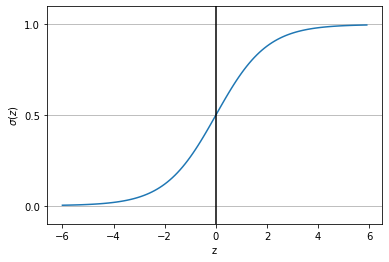

In [12]:
# plot sigmoid function
z = np.arange(-6, 6, 0.1)
𝜎_z = sigmoid(z)

_, ax = plt.subplots()
ax.plot(z, 𝜎_z)
ax.axvline(0.0, color='k')
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('z')
ax.set_ylabel('$\sigma (z)$')
ax.set_yticks([0.0, 0.5, 1.0])
ax.yaxis.grid(True)

plt.show()

In [13]:
from IPython.display import Image

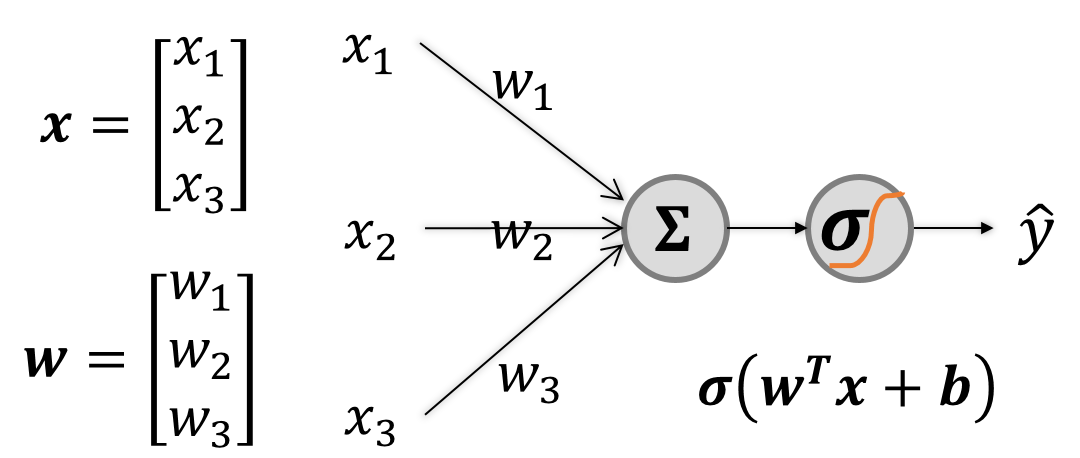

In [14]:
Image(filename='images/LogisticRegression.png', width=480)

### § Binary Logistic Regression 學習模型

Given **input** example $x \in \mathbb{R}^{n}$, we want

$$\hat{y} = P(y=1|x;w), \quad 0 \leq y \leq 1$$

with linear predictor **parameter** $w \in \mathbb{R}^{n}, b \in \mathbb{R}$ of the form $w^{T}x + b$ to yield **probability ouput**,

$$\hat{y} = a = \sigma(w^{T}x + b) = \frac{1}{1 + e^{-(w^{T}x + b)}} \tag{1}$$

where $w^{T}x$ is the inner product between the weight vector $w$ and the feature vector $x$. This function defines a linear **hyperplane**, with normal vecetor $w$ and an offset $b$ from the origin. Supposed a plane in a 3D feature space going through a point $x_{0}$ with surface normal $w$. Points on the surface satisfy $w^{T}(x - x_{0}) = 0$. If we define $b = -w^{T}x_{0}$, we can rewrite this as $w^{T}x + b = 0$. This plane separate 3D space into two half spaces. This linear plane is known as **decsion boundary** [3].

for input $i = 1 \dots m$ samples, we want to maximize the likelihood $L$ and assume that samples in dataset are independent.

$$ L(w) = P(y|x;w) = \prod_{i=1}^{m} \big( a^{(i)} \big)^{y^{(i)}} \big( 1 - a^{(i)} \big)^{1 - y^{(i)}} $$

Maximizing the log-likelihood function is a lot easier.

$$ \log \big( L(w) \big) = \sum_{i=1}^{m} \big[ y^{(i)} \log \big( a^{(i)} \big)  + \big( 1 - y^{(i)} \big) \log \big( 1 - a^{(i)} \big) \big] $$

In practice, we minimize the **Negative Log-Likelihood (NLL)** using *gradient descent* optimization algorithm.

$$ \mathcal{L(w)} = -\sum_{i=1}^{m} \big[ y^{(i)} \log \big( a^{(i)} \big) + \big( 1 - y^{(i)} \big) \log \big( 1 - a^{(i)} \big) \big]$$

The learning cost $J$ (with $a$ rewrite as $\hat{y}$) is then computed as

$$ J(w) = -\frac{1}{m} \sum_{i=1}^{m} \big[ y^{(i)} \log \big( \hat{y}^{(i)} \big) + \big( 1 - y^{(i)} \big) \log \big( 1 - \hat{y}^{(i)} \big) \big] \tag{2}$$

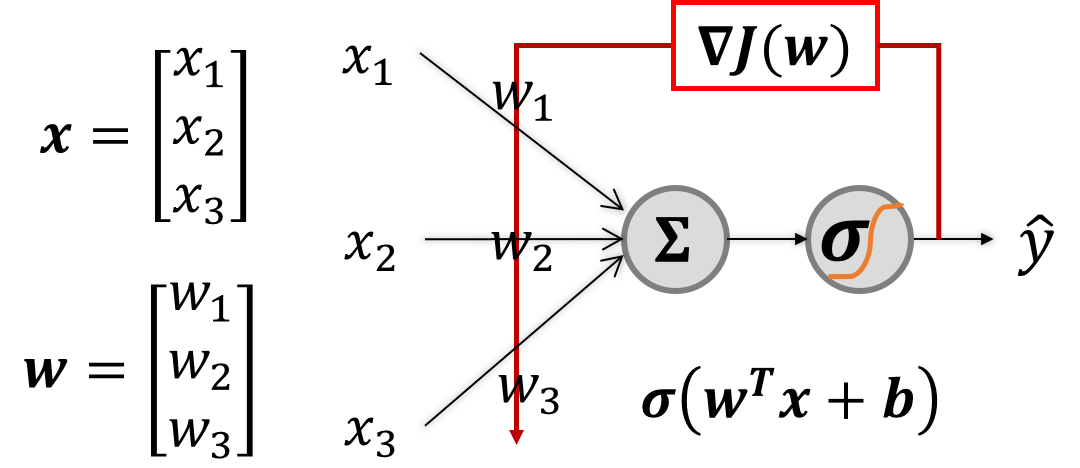

In [15]:
Image(filename='images/LogisticRegression_GradientDescent.png', width=480)

<a id="gradient-descent"></a>

## 14.4 Gradient Descent 最佳化演算法

The idea of gradient descent is just like climbing down a hill. For each **iteration** $t$, we take a step in the opposite direction of the gradient until a local or global cost minima is reached. The step size is determined by the value of the **learning rate** $\eta$.

$$
    w_{t+1} = w_{t} - \eta \nabla J(w)
$$

完整使用 gradient descent 最佳化的 logistic regression 步驟（"forward" and "backward" propagation）如下：

1. 輸入 $X_{m \times n}$
2. 隨機初始化權重參數 $w$ 與 $b$
3. （*forward*）計算 $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m)})$
4. 計算損失（成本）函數 $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$
5. 計算當下的梯度 $\nabla J(w)$
6. （*backward*）更新參數 $w = w - \eta \nabla J(w)$
7. 重複以上步驟，直到損失收斂到最小，或達到事先設定的迭代次數。

Here are the derived formulas for $\nabla J(w)$

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T \tag{3}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)}) \tag{4}$$


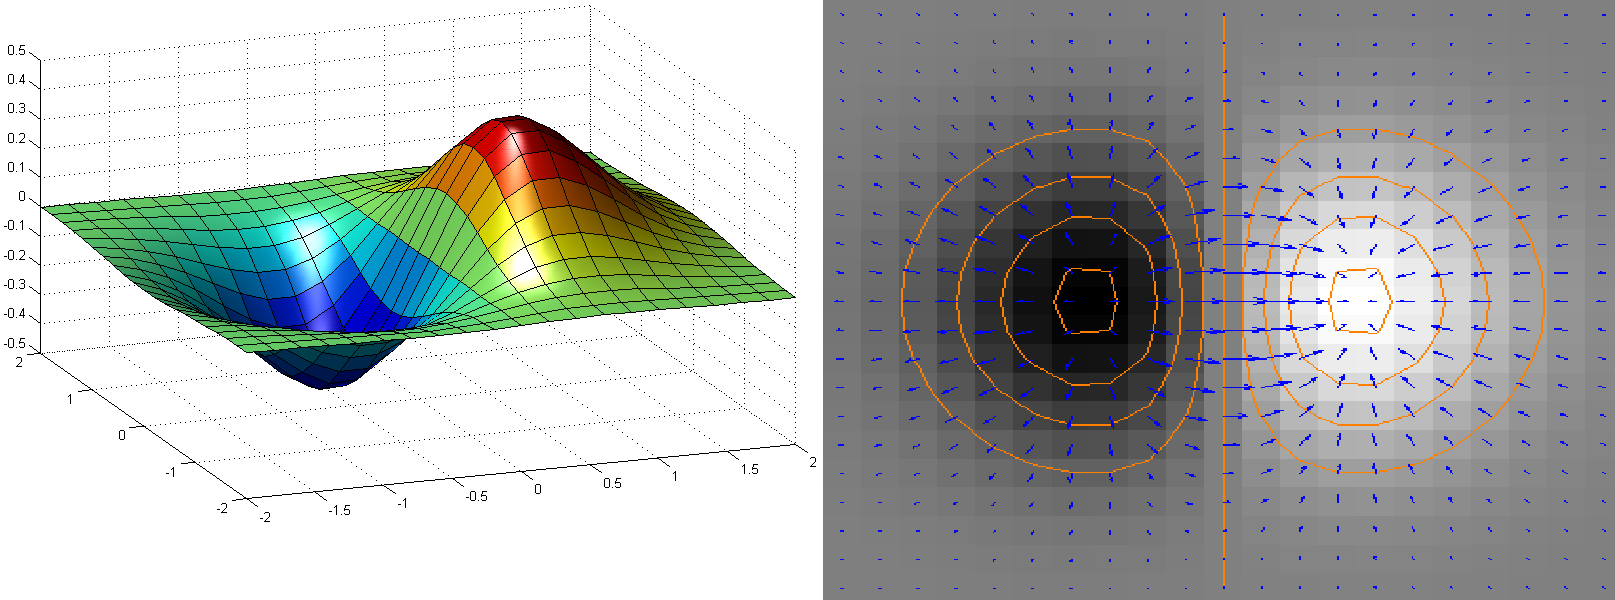

In [16]:
# 梯度場圖示
Image(filename='images/GradientField_BumpAndPit.png', width=960)

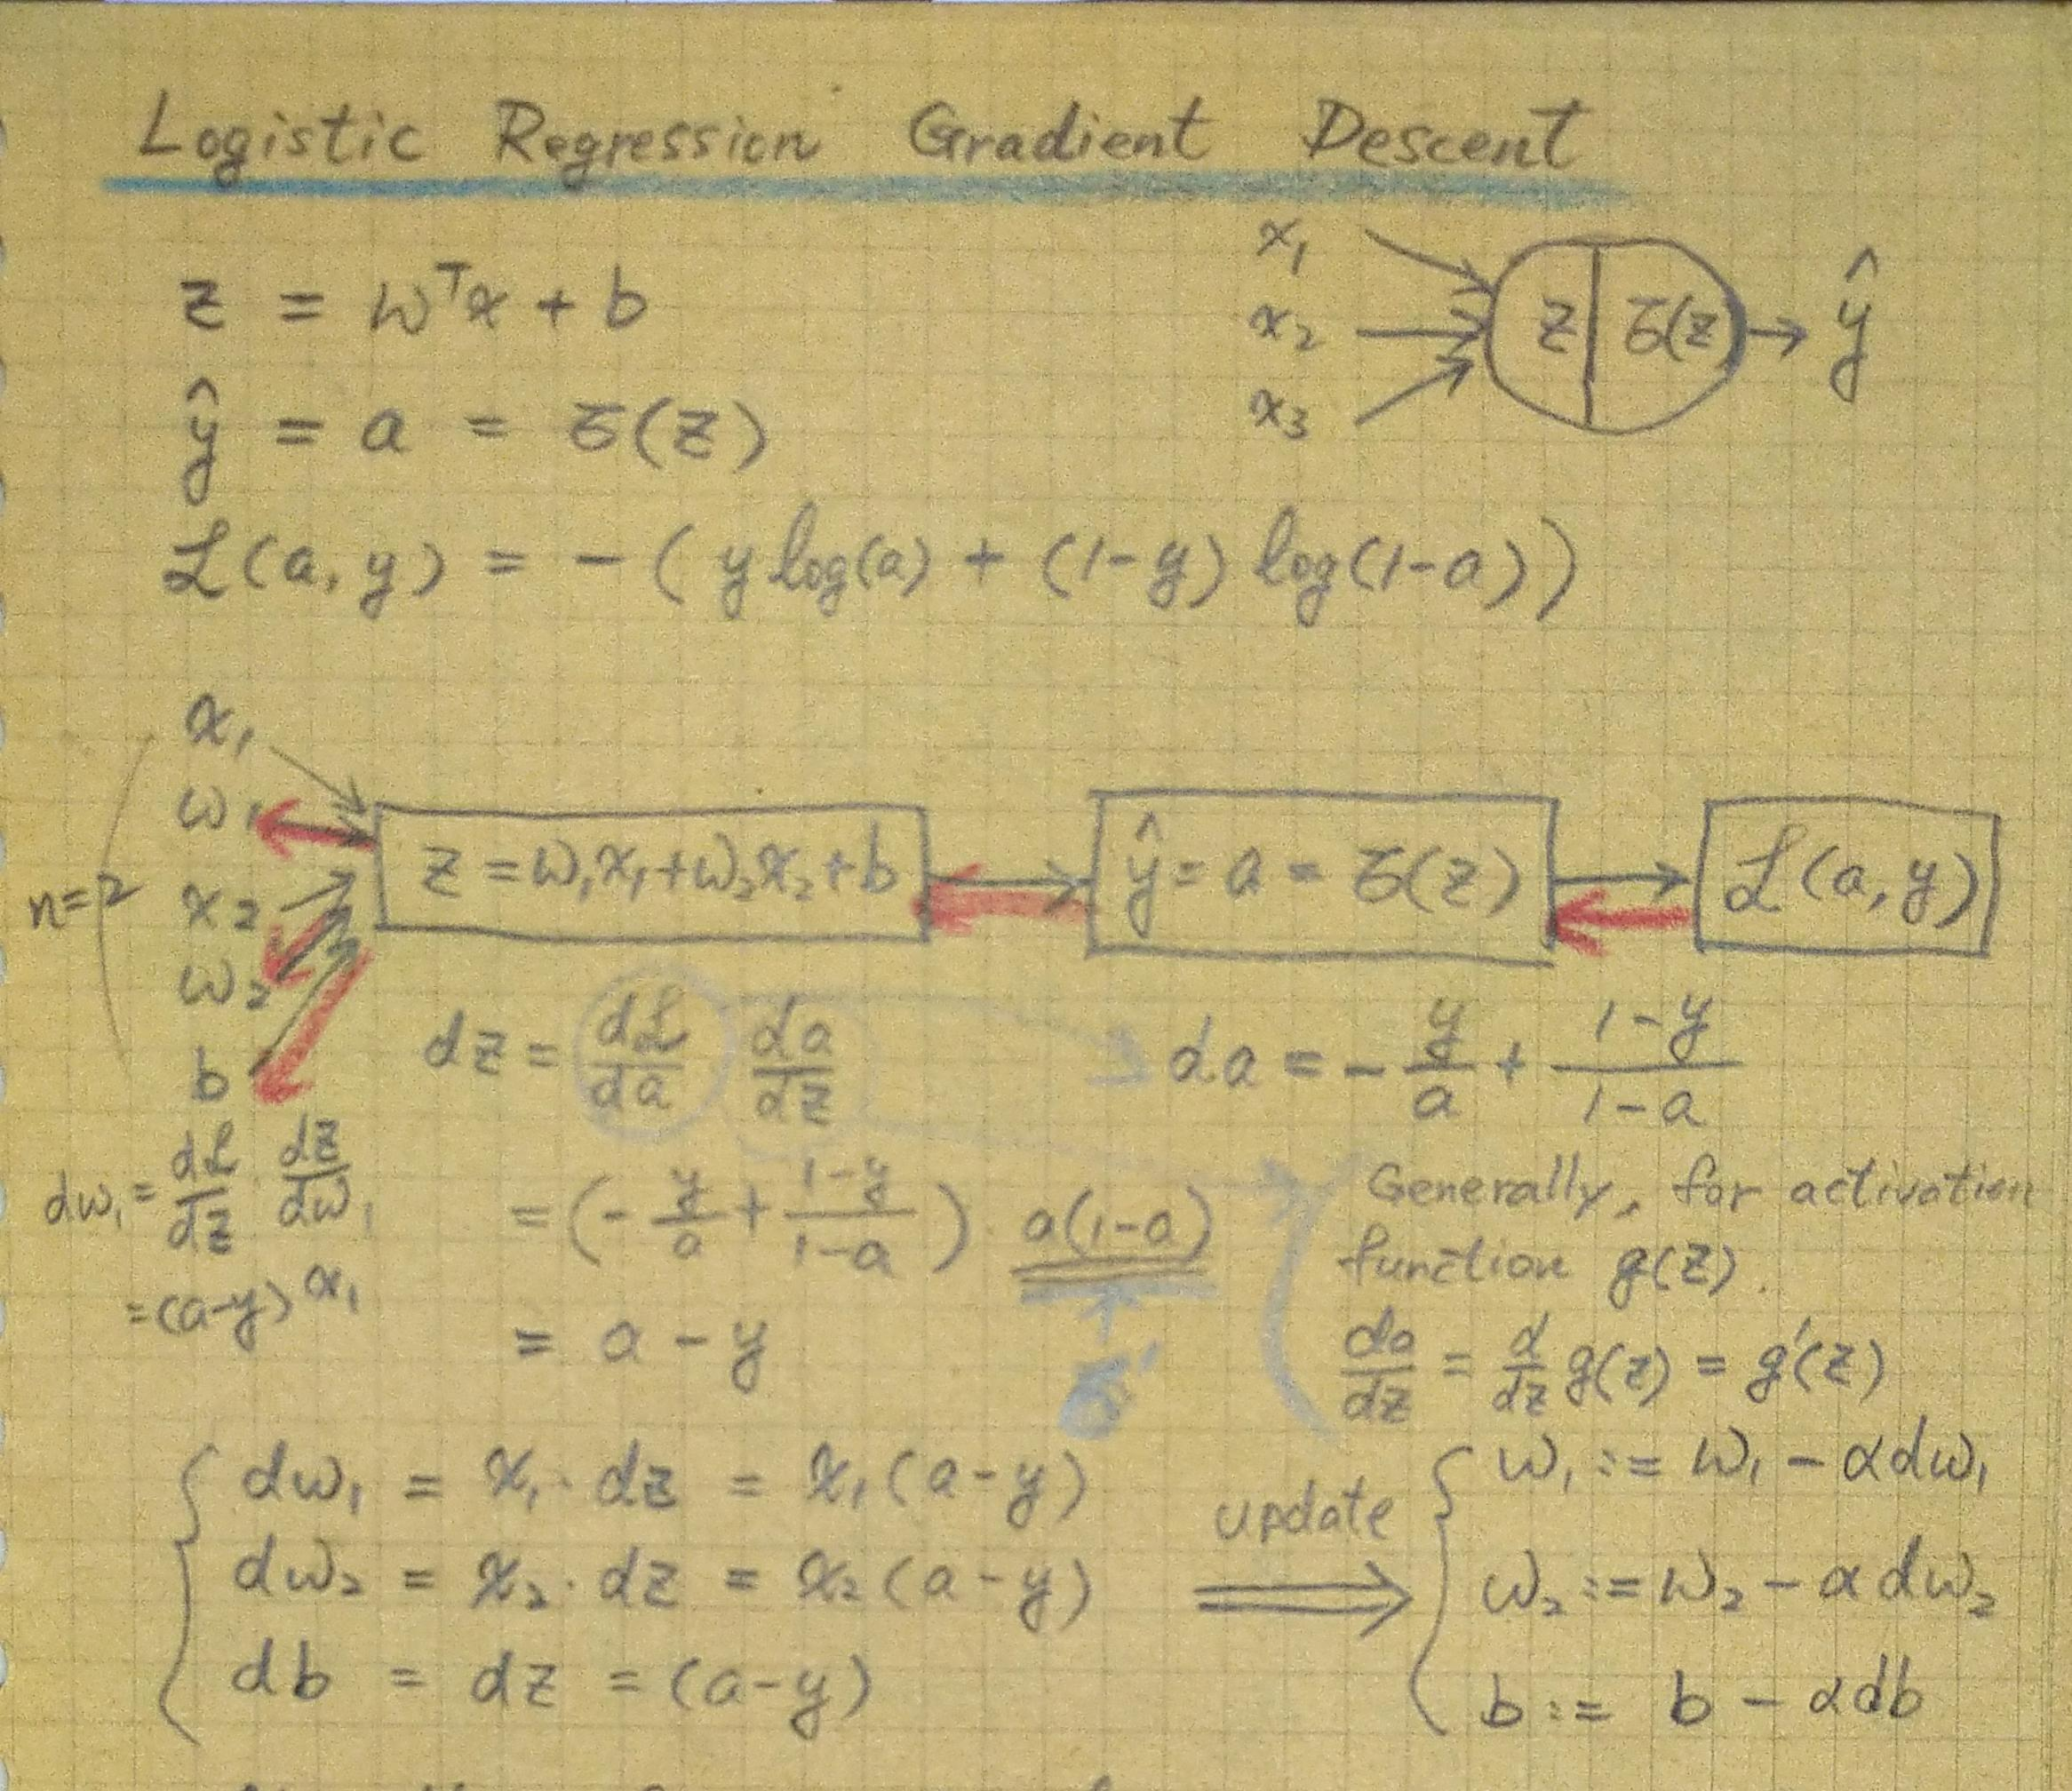

In [17]:
# Binary Cross-Entropy 梯度反向傳播的公式推導
Image(filename='images/BinaryCrossEntropy_BackwardPropagation.jpg', width=960)

<a id="blr-fromscratch"></a>

## 14.5 從頭實作 Binary Logistic Regression


In [18]:
def accuracy(Y, Y_predict):
  """compute classification accuracy score
  """
  return np.average(Y == Y_predict)

In [19]:
class BinaryLogisticRegression:
    """Logistic Regression binary classification with gradient descent.

    Parameters
    ----------
    learning_rate : float
    n_iteration : int
    """
    def __init__(self, learning_rate=0.01, n_iteration=1000):
        self.eta = learning_rate
        self.n_iter = n_iteration
        # for recording the training history
        self.costs = []

    def initialize(self, n_features):
        """Initialize parameters: weight and bias
        """
        rng = np.random.default_rng()
        self.W = rng.normal(loc=0.0, scale=0.01, size=(n_features,1))
        self.b = rng.normal(loc=0.0, scale=0.01)

    def forward(self, X):
        """Forward propagation

        Parameters
        ----------
        X : np.ndarray, shape = (n_features, n_samples)
        """
        return sigmoid(np.dot(self.W.T, X) + self.b)

    def fit(self, X, Y):
        """Fit training data

        Parameters
        ----------
        X : np.ndarray, shape = (n_features, n_samples)
        Y : np.ndarray, shape = (n_samples,)
        """
        self.initialize(X.shape[0])
        # m is the number of samples
        m = X.shape[1]
        # gradient descent optimization loop
        for i in range(1,self.n_iter+1):
            # forward pass
            A = self.forward(X)
            cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
            # backward propagation, 事先已推導的梯度公式
            dW = np.dot(X, (A - Y).T) / m
            db = np.sum(A - Y) / m
            # update parameters
            self.W -= self.eta * dW
            self.b -= self.eta * db
            # keep the cost
            self.costs.append(cost)
            if i % 10 == 0:
                acc = accuracy(Y, self.predict(X))
                print('#{} iteration: accuracy = {:.3f}, cost = {:.3f}'.format(i, acc, cost), flush=True)

    def predict(self, X):
        """ Predict 0 or 1 using learned parameters (W, b)

        Parameters
        ----------
        X : np.ndarray, shape = (n_features, n_samples)
        """
        A = self.forward(X)
        Y_predict = np.where(A > 0.5, 1, 0)
        return Y_predict


### § 載入資料集準備訓練

In [20]:
# load data
dsWdbc = WdbcDataset()
X_train, X_test, Y_train, Y_test = dsWdbc.get_xy(standardize=True, transpose=True)

print('WDBC data loaded:')
print('\tTraining set shape: X {}, Y {}'.format(X_train.shape, Y_train.shape))
print('\tTesting set shape: X {}, Y {}'.format(X_test.shape, Y_test.shape))

WDBC data loaded:
	Training set shape: X (30, 455), Y (1, 455)
	Testing set shape: X (30, 114), Y (1, 114)


### § 訓練自建的模型

In [21]:
# construct logistic regression model
blr = BinaryLogisticRegression(learning_rate=0.005, n_iteration=2000)

# train and watch out for the progress
blr.fit(X_train, Y_train)

# test to validate the performance
Y_predict = blr.predict(X_test)
print('Test accuracy = {:.3f}'.format(accuracy(Y_test, Y_predict)))

#10 iteration: accuracy = 0.923, cost = 0.619
#20 iteration: accuracy = 0.936, cost = 0.555
#30 iteration: accuracy = 0.941, cost = 0.506
#40 iteration: accuracy = 0.938, cost = 0.467
#50 iteration: accuracy = 0.941, cost = 0.436
#60 iteration: accuracy = 0.943, cost = 0.410
#70 iteration: accuracy = 0.943, cost = 0.388
#80 iteration: accuracy = 0.945, cost = 0.369
#90 iteration: accuracy = 0.945, cost = 0.353
#100 iteration: accuracy = 0.945, cost = 0.339
#110 iteration: accuracy = 0.945, cost = 0.326
#120 iteration: accuracy = 0.947, cost = 0.315
#130 iteration: accuracy = 0.949, cost = 0.304
#140 iteration: accuracy = 0.952, cost = 0.295
#150 iteration: accuracy = 0.954, cost = 0.287
#160 iteration: accuracy = 0.956, cost = 0.279
#170 iteration: accuracy = 0.956, cost = 0.272
#180 iteration: accuracy = 0.956, cost = 0.266
#190 iteration: accuracy = 0.956, cost = 0.259
#200 iteration: accuracy = 0.956, cost = 0.254
#210 iteration: accuracy = 0.960, cost = 0.249
#220 iteration: accura

#1740 iteration: accuracy = 0.980, cost = 0.108
#1750 iteration: accuracy = 0.980, cost = 0.108
#1760 iteration: accuracy = 0.980, cost = 0.108
#1770 iteration: accuracy = 0.980, cost = 0.107
#1780 iteration: accuracy = 0.980, cost = 0.107
#1790 iteration: accuracy = 0.980, cost = 0.107
#1800 iteration: accuracy = 0.980, cost = 0.107
#1810 iteration: accuracy = 0.980, cost = 0.107
#1820 iteration: accuracy = 0.980, cost = 0.106
#1830 iteration: accuracy = 0.980, cost = 0.106
#1840 iteration: accuracy = 0.980, cost = 0.106
#1850 iteration: accuracy = 0.980, cost = 0.106
#1860 iteration: accuracy = 0.980, cost = 0.106
#1870 iteration: accuracy = 0.980, cost = 0.106
#1880 iteration: accuracy = 0.980, cost = 0.105
#1890 iteration: accuracy = 0.980, cost = 0.105
#1900 iteration: accuracy = 0.980, cost = 0.105
#1910 iteration: accuracy = 0.980, cost = 0.105
#1920 iteration: accuracy = 0.980, cost = 0.105
#1930 iteration: accuracy = 0.980, cost = 0.104
#1940 iteration: accuracy = 0.980, cost 

### § 檢視訓練歷程

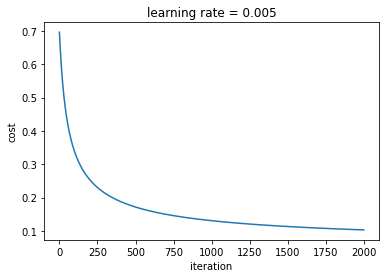

In [22]:
# plot the learning history
fig, ax = plt.subplots()
ax.plot(blr.costs)
ax.set_xlabel('iteration')
ax.set_ylabel('cost')
ax.set_title('learning rate = {}'.format(blr.eta))
plt.show()

<a id="sklearn-lr"></a>

## 14.6 使用 Scikit-Learn 的 LogisticRegression


In [23]:
# load data
dsWdbc = WdbcDataset()
# 注意： scikit-learn 的模型接受的輸入都是 (n_samples, n_features) 的形狀
X_train, X_test, Y_train, Y_test = dsWdbc.get_xy(standardize=True, transpose=False)

print('WDBC data loaded:')
print('\tTraining set shape: X {}, Y {}'.format(X_train.shape, Y_train.shape))
print('\tTesting set shape: X {}, Y {}'.format(X_test.shape, Y_test.shape))

WDBC data loaded:
	Training set shape: X (455, 30), Y (455,)
	Testing set shape: X (114, 30), Y (114,)


In [24]:
from sklearn.linear_model import LogisticRegression
sklr = LogisticRegression(max_iter=300)

sklr.fit(X_train, Y_train)

# 測試模型的準確度
print('Accuracy = {:.3f}'.format(sklr.score(X_test, Y_test)))

Accuracy = 0.974


<a id="references"></a>

## References

1. Andrew Ng, "*Neural Networks and Deep Learning*", Deep Learning Specialization Couse 1, 2017. [[YouTube]](https://youtu.be/CS4cs9xVecg?list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0)
2. Sebastian Raschka and Vahid Mirjalili. "*Python Machine Learning: Machine Learning and Deep Learning with Python, Scikit-Learn, and TensorFlow*". Second edition, Packt Publishing, 2017.
3. Murphy, Kevin P. "*Machine learning: a probabilistic perspective*". MIT press, 2012.
